# 1. Import all the distributions

In [1]:
%pylab inline --no-import-all
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Get distribs and filter bad ones
import distributions

all_distributions_dict = dict([(name, cls) for name, cls in distributions.__dict__.items() if isinstance(cls, type)])
all_distributions_list = [(cls) for name, cls in distributions.__dict__.items() if isinstance(cls, type)]

ok_distributions_list=[]
problems=[]
for i, cls in enumerate(all_distributions_list):
    #print(cls)
    try:
        dist = cls()
        N_test = 100000
        #print('will try to generate for %s' %(cls.__name__))
        if dist.pdf(dist.x_min + .3*(dist.x_max-dist.x_min)) < 1E-3:
            print("may have a problem")
            continue
            
        rvs = dist.rvs(N_test)
        if np.abs(np.mean(rvs) - dist.mean()) > 5*np.std(rvs)/np.sqrt(N_test):
            print("means don't match for %s: %f vs. %f" %(cls.__name__, 
                                                          np.mean(rvs), dist.mean()))
            continue
            
        elif np.abs(np.std(rvs) - dist.std()) > 5*np.std(rvs)/np.sqrt(np.sqrt(1.*N_test)):
            print("std devs. don't match for %s: %f vs. %f" %(cls.__name__, 
                                                          np.std(rvs), dist.std()))
            continue
        elif np.abs(np.std(rvs) - dist.std()) / dist.std() > 0.1:
            print("std devs. don't match for %s: %f vs. %f" %(cls.__name__, 
                                                          np.std(rvs), dist.std()))
            continue
        
        elif np.sum(dist.pdf(np.linspace(dist.x_min,dist.x_max,100))<0) > 0:
            print("pdf was negative in some places")
            continue                    

        else:
            # print("%s passes tests, adding it" %(cls.__name__))
            ok_distributions_list.append(cls)
    except:
        print("%s has errors, does't work" %(cls.__name__))
        continue

print "\nOK distributions: {0}".format([i.__name__ for i in ok_distributions_list])

std devs. don't match for Dist_vag273: 0.144361 vs. 0.288675
std devs. don't match for Dist_pc1727: 0.845813 vs. 1.000000
means don't match for Dist_hk1764: -0.418165 vs. -0.410000
std devs. don't match for Dist_rdr335: 0.399033 vs. 0.100000
means don't match for Dist_mh3908: 0.855819 vs. 2.364890
std devs. don't match for Dist_ptf223: 2.848381 vs. 2.150000
means don't match for Dist_jeg535: -3.289435 vs. 0.072000
std devs. don't match for Dist_sar653_1: 0.500168 vs. 0.626657
std devs. don't match for Dist_jgc375: 13.743079 vs. 15.655860
std devs. don't match for Dist_dl3185: 0.775158 vs. 0.632456
std devs. don't match for Dist_vag273_1: 0.144413 vs. 0.288675
Dist_ae1389 has errors, does't work
may have a problem

OK distributions: ['Dist_sm6376', 'Dist_ry643', 'Dist_yr595', 'Dist_psa251_2', 'Dist_kw1621', 'Dist_nj18', 'Dist_yz2668', 'Dist_psa251', 'Dist_ejk483', 'Dist_my1462', 'Dist_ih646', 'Dist_kc90_2', 'Dist_kc90_3', 'Dist_vag273_2', 'Dist_msc565', 'Dist_jn1348', 'Dist_az1332', 'Di

# 2. Run convolutions

Select number of samples to run

In [3]:
N_SAMPLES = 100000
N_BINS    = 50

In [4]:
# Split functions to provide more generality
def random_convolution(list_of_distributions, N, size):
    q = np.zeros(size)
    var_q = 0.
    mean_q = 0.
    
    print 'Number of iterations: %d' % (N)

    for dist_class in np.random.choice(list_of_distributions,N):
        dist = dist_class()
        
        print 'Using: %s ' % (dist_class.__name__)
        
        q      += dist.rvs(size)
        var_q  += dist.std()**2
        mean_q += dist.mean()

    std_q = np.sqrt( var_q )
    
    print '' # spacer
    
    return q, mean_q, std_q

def graph_convolution(dist, mean_dist, std_dist):
    counts, bins, patches = plt.hist(dist, bins=N_BINS, normed=True, alpha=.2)
    plt.plot(bins, stats.norm.pdf(bins, loc=mean_dist, scale=std_dist), lw=2, c='r')
    plt.show()
    
    return counts, bins

Number of iterations: 2
Using: Dist_my1462 
Using: Dist_kc90_2 



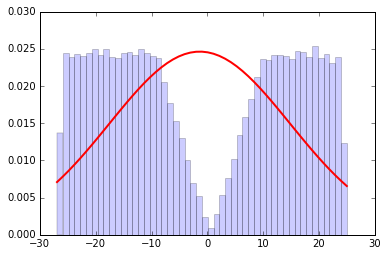

Number of iterations: 4
Using: Dist_yr595 
Using: Dist_jsg549 
Using: Dist_kjm538 
Using: Dist_kjm538 



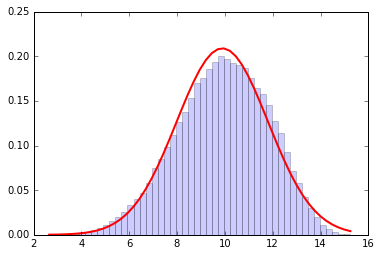

Number of iterations: 8
Using: Dist_ejk483 
Using: Dist_vag273_2 
Using: Dist_sm6376 
Using: Dist_jsg549 
Using: Dist_az1332 
Using: Dist_msc565 
Using: Dist_jsg549 
Using: Dist_ry643 



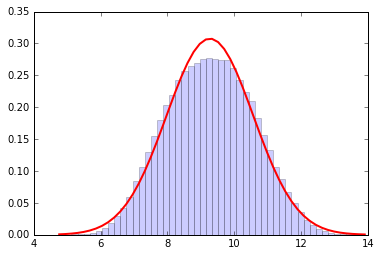

Number of iterations: 16
Using: Dist_ry643 
Using: Dist_saw533 
Using: Dist_saw533 
Using: Dist_psa251 
Using: Dist_jn1348 
Using: Dist_ejk483 
Using: Dist_jn1348 
Using: Dist_kw1621 
Using: Dist_ry643 
Using: Dist_ih646 
Using: Dist_yz2668 
Using: Dist_yz2668 
Using: Dist_kw1621 
Using: Dist_saw533 
Using: Dist_yz2668 
Using: Dist_psa251_2 



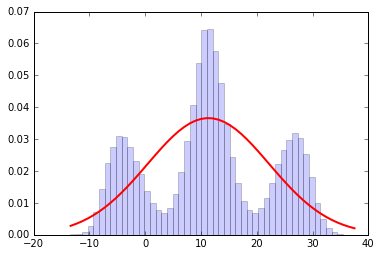

Number of iterations: 32
Using: Dist_kc90_3 
Using: Dist_msc565 
Using: Dist_jn1348 
Using: Dist_recast 
Using: Dist_ejk483 
Using: Dist_jn1348 
Using: Dist_psa251 
Using: Dist_ejk483 
Using: Dist_psa251_2 
Using: Dist_psa251_2 
Using: Dist_vag273_2 
Using: Dist_ejk483 
Using: Dist_kc90_2 
Using: Dist_kc90_3 
Using: Dist_sm6376 
Using: Dist_az1332 
Using: Dist_msc565 
Using: Dist_kjm538 
Using: Dist_msc565 
Using: Dist_my1462 
Using: Dist_my1462 
Using: Dist_jn1348 
Using: Dist_saw533 
Using: Dist_ejk483 
Using: Dist_vag273_2 
Using: Dist_jsg549 
Using: Dist_psa251_2 
Using: Dist_ih646 
Using: Dist_jsg549 
Using: Dist_yr595 
Using: Dist_ry643 
Using: Dist_kc90_3 



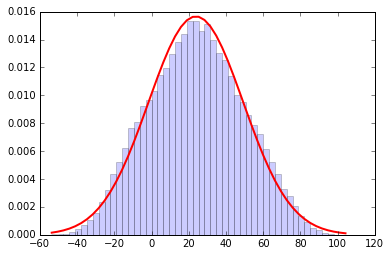

In [5]:
# 2 iterations
y2, mu_y2, s_y2 = random_convolution(ok_distributions_list, 2, N_SAMPLES)
y2_counts, y2_bins = graph_convolution(y2, mu_y2, s_y2)

# 4 iterations
y4, mu_y4, s_y4 = random_convolution(ok_distributions_list, 4, N_SAMPLES)
y4_counts, y4_bins = graph_convolution(y4, mu_y4, s_y4)

# 8 iterations
y8, mu_y8, s_y8 = random_convolution(ok_distributions_list, 8, N_SAMPLES)
y8_counts, y8_bins = graph_convolution(y8, mu_y8, s_y8)

# 16 iterations
y16, mu_y16, s_y16 = random_convolution(ok_distributions_list, 16, N_SAMPLES)
y16_counts, y16_bins = graph_convolution(y16, mu_y16, s_y16)

# 32 iterations
y32, mu_y32, s_y32 = random_convolution(ok_distributions_list, 32, N_SAMPLES)
y32_counts, y32_bins = graph_convolution(y32, mu_y32, s_y32)

# 3. Generate norm predictions from bins

In [6]:
def fetch_bin_centers(bins):
    centers = (bins[1:] + bins[:-1]) / 2.
    return centers

def bin_width(bins):
    return bins[1] - bins[0]

def check_counts(counts, width):
    return np.sum(counts * width)

y2c  = fetch_bin_centers(y2_bins)
y4c  = fetch_bin_centers(y4_bins)
y8c  = fetch_bin_centers(y8_bins)
y16c = fetch_bin_centers(y16_bins)
y32c = fetch_bin_centers(y32_bins)

Check if the area is ~1, a feature of the Gaussian normal distribution (or any distribution)

In [7]:
a2  = check_counts(y2_counts, bin_width(y2_bins))
a4  = check_counts(y4_counts, bin_width(y4_bins))
a8  = check_counts(y8_counts, bin_width(y8_bins))
a16 = check_counts(y16_counts, bin_width(y16_bins))
a32 = check_counts(y32_counts, bin_width(y32_bins))

print 'Area checks: %f, %f, %f, %f, %f' % (a2, a4, a8, a16, a32)

Area checks: 1.000000, 1.000000, 1.000000, 1.000000, 1.000000


All check out $\checkmark$  
Now get the expected distributions from the convolutions

In [8]:
def get_exp(cen, mu, s, plot=True):
    foo = stats.norm.pdf(cen, loc=mu, scale=s)
    
    if plot:
        plt.plot(cen, foo)
        plt.xlabel('Predicted distribution curve')
        plt.show()
    
    return foo

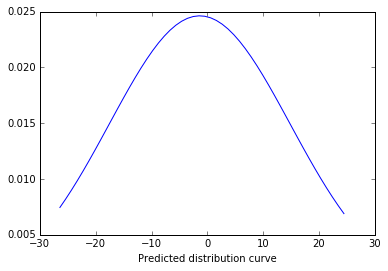

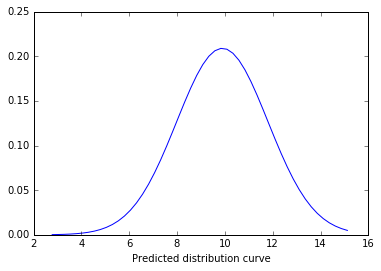

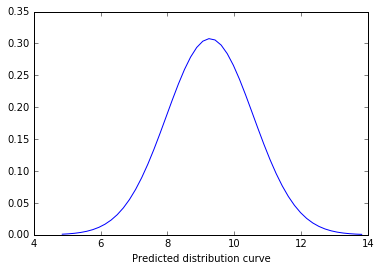

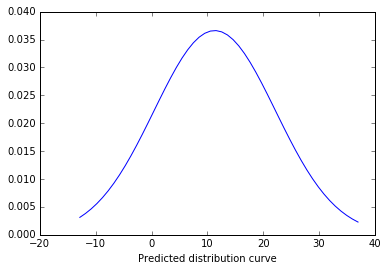

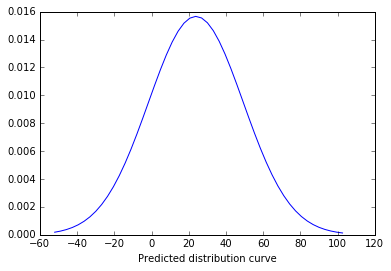

In [9]:
p2  = get_exp(y2c, mu_y2, s_y2)
p4  = get_exp(y4c, mu_y4, s_y4)
p8  = get_exp(y8c, mu_y8, s_y8)
p16 = get_exp(y16c, mu_y16, s_y16)
p32 = get_exp(y32c, mu_y32, s_y32)

# 4. Chi-Square Test

In [10]:
def chi2(counts, exp):
    return np.sum(((counts - exp)** 2.) / exp)

X2  = chi2(y2_counts, p2)
X4  = chi2(y4_counts, p4)
X8  = chi2(y8_counts, p8)
X16 = chi2(y16_counts, p16)
X32 = chi2(y32_counts, p32)

print 'Chi-Squared values: %f, %f, %f, %f, %f' % (X2, X4, X8, X16, X32)

Chi-Squared values: 0.482478, 0.056599, 0.066116, 0.457559, 0.004780


Plot number of iterations vs. $\chi^2$ values

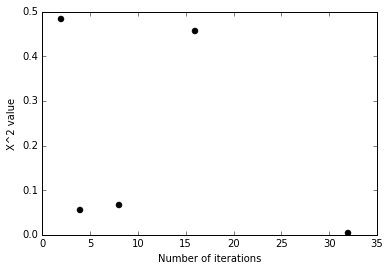

In [11]:
plt.plot(2., X2, 'ko')
plt.plot(4., X4, 'ko')
plt.plot(8., X8, 'ko')
plt.plot(16., X16, 'ko')
plt.plot(32., X32, 'ko')

plt.xlabel('Number of iterations')
plt.ylabel('X^2 value')

Now run $\chi^2$ distribution tests

In [12]:
def chisq_test(counts, exp, a=0.01):
    cs_obs, p_val = stats.chisquare(counts, f_exp=exp)
    
    print 'Using a = %f' % a
    
    if p_val < (a / 100.):
        print 'There is very strong evidence for the data to not match the model'
    elif p_val < (a / 10.):
        print 'There is strong evidence for the data to not match the model'
    elif p_val < (a):
        print 'There is evidence for the data to not match the model'
    else:
        print 'There is not enough evidence for the data to not match the model'
    
    print 'p-value: %f\n' % p_val

In [13]:
chisq_test(y2_counts, p2)
chisq_test(y4_counts, p4)
chisq_test(y8_counts, p8)
chisq_test(y16_counts, p16)
chisq_test(y32_counts, p32)

Using a = 0.010000
There is not enough evidence for the data to not match the model
p-value: 1.000000

Using a = 0.010000
There is not enough evidence for the data to not match the model
p-value: 1.000000

Using a = 0.010000
There is not enough evidence for the data to not match the model
p-value: 1.000000

Using a = 0.010000
There is not enough evidence for the data to not match the model
p-value: 1.000000

Using a = 0.010000
There is not enough evidence for the data to not match the model
p-value: 1.000000



At the ```a = 0.01 level```, the p-values above are all equal to 1, suggesting that the data confirms with the hypothesis of the Central Limit Theorem